### Temperature Forecast Project using ML


#### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

#### Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv


In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Gathering

In [123]:
#importing data
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### Data Pre-processing

In [124]:
data.shape

(7752, 25)

Rows : 907, Columns : 27

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Observations:

1. except for the column 'date', rest for the columns are of float64 datatype, while 'date' column is having object datatyep  
2. seem to have null values in the dataset

In [126]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

#### Obersvarion:
except for columns : 'lat', 'lon', 'DEM', 'Slope' and 'Solar radiation' all other columns are having null values

#### Dropping the null values from the dataset

In [127]:
data=data.dropna()

In [128]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


#### No null values in dataset now

#### #Check for white spaces

In [130]:
data.isin([' ','NA','-']).sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

#### Observation: NO white spaces or 'NA' or '-' values in dataset

#### #Getting value counts in each column

In [131]:
for column in data:
    print(data[column].value_counts())

25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64
30-06-2013    25
23-07-2016    25
22-08-2015    25
23-08-2015    25
24-08-2015    25
              ..
13-08-2015    22
24-07-2015    22
06-07-2017    22
23-08-2017    22
30-06-2017    16
Name: Date, Length: 307, dtype: int64
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
            ..
5

#### #Obseravtions:
1. Dataset is no more having any null values
2. Data for all the columns seems to be continious, except for columns 'station', 'lat', 'lon', 'DEM' and 'slope'

#### Changing the datatype of column 'Date' from object to datetime

In [132]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 n

#### Splitting date into day month year

In [133]:
data['Day']=data['Date'].dt.day
data['Mth']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [134]:
data.drop(['Date'],axis=1,inplace=True)

In [135]:
data['Day']=data['Day'].astype(float)
data['Mth']=data['Mth'].astype(float)
data['Year']=data['Year'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


### EDA

In [136]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Mth,Year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,16.337375,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.216880,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


#### Observation:
seems to be having skewness in some columns like 'Slope', 'DME', 'LDAPS_PPT4', 'LDAPS_PPT3', 'LDAPS_PPT2','LDAPS_PPT1' 'LDAPS_CC1', 'LDAPS_LH', 'LDAPS_RHmax'

In [137]:
data.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Mth                -0.703092
Year                0.013575
dtype: float64

#### Confirming skewness in columns 'Slope', 'DEM', 'LDAPS_PPT4', 'LDAPS_PPT3', 'LDAPS_PPT3', 'LDAPS_PPT1' and 'LDAPS_WS'

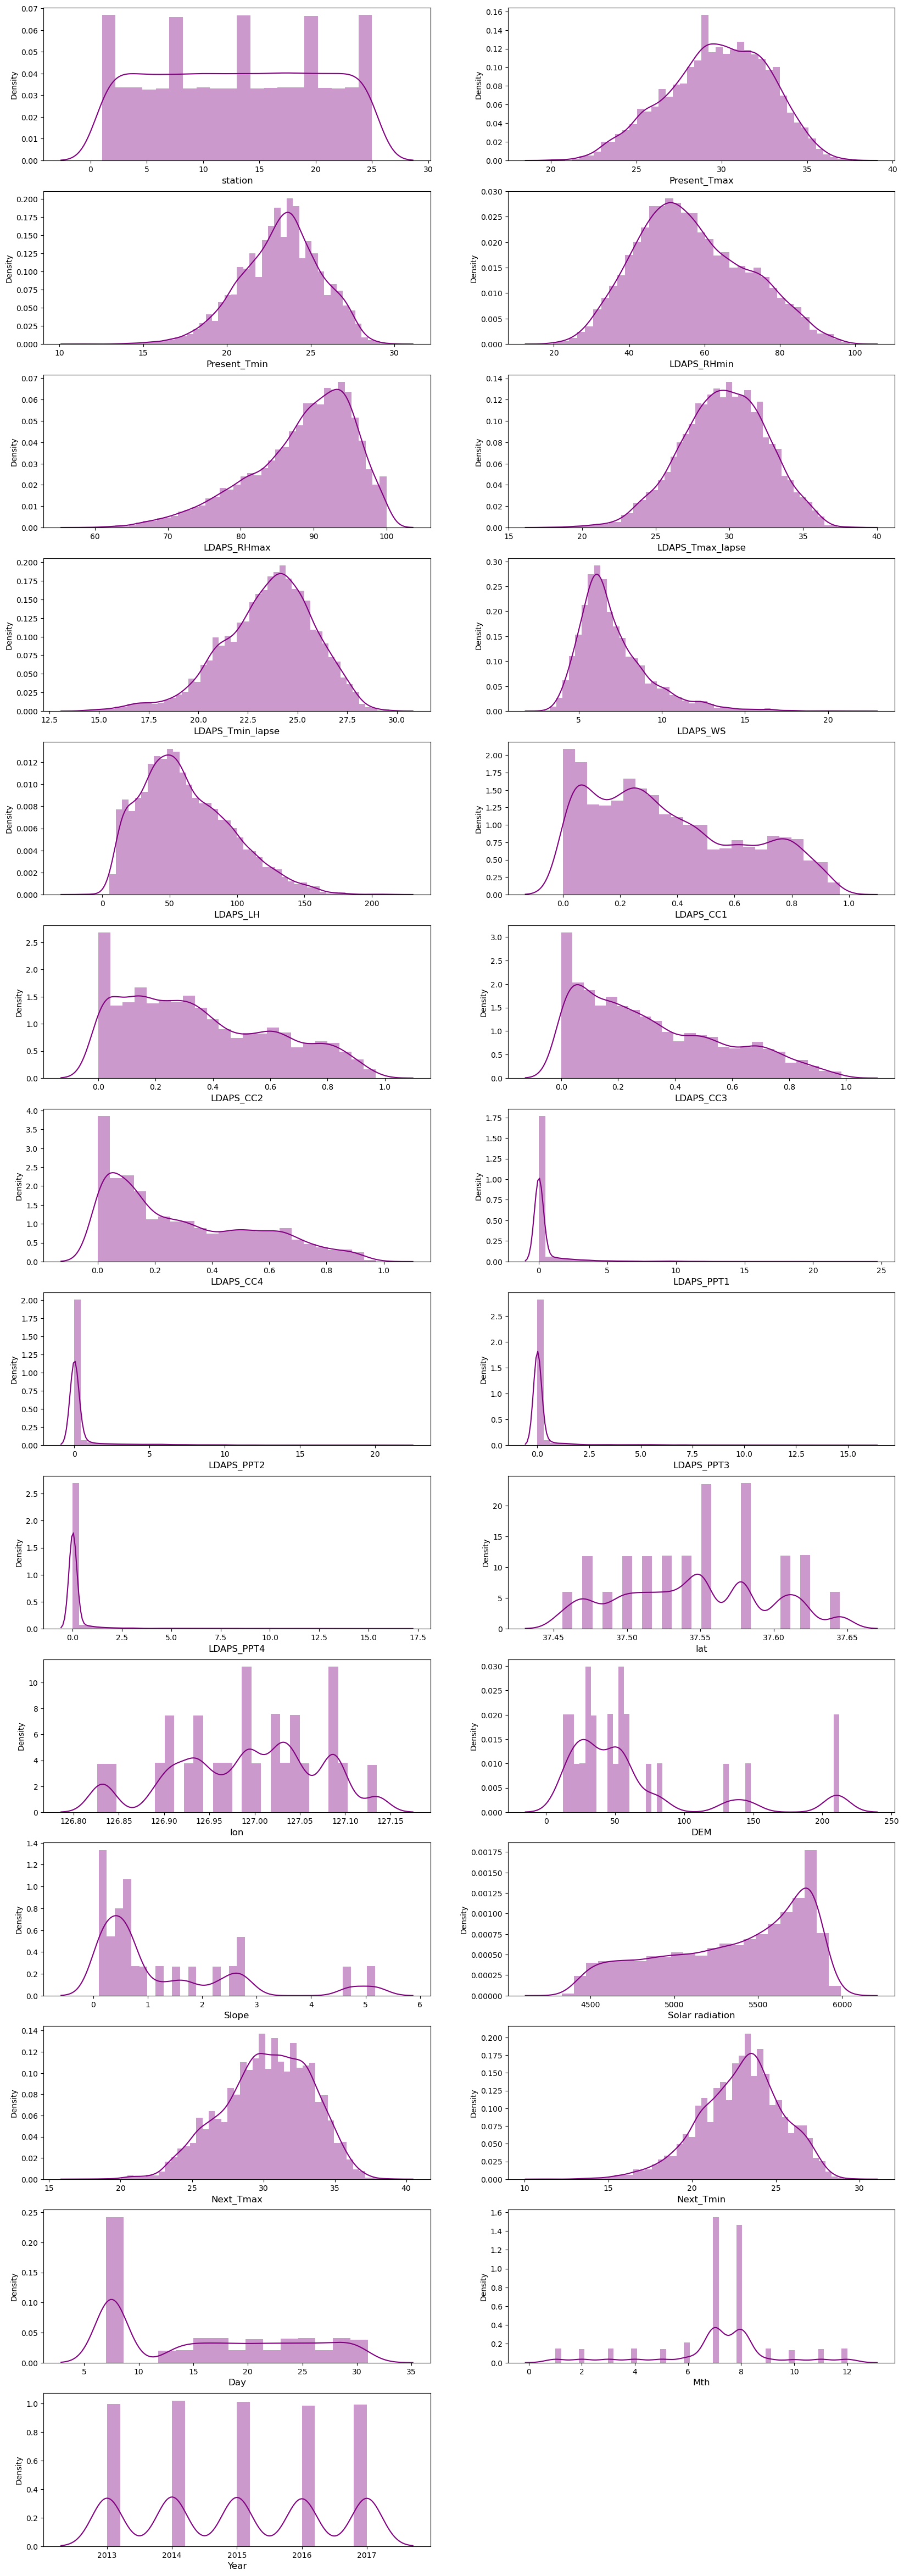

In [138]:
plt.figure(figsize=(20,60))
pltno=1
for column in data:
    if pltno<=27:
        plt.subplot(14,2,pltno)
        sns.distplot(data[column], color='purple')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### #Observations:
1. columns 'LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM' and 'Slope' having skewness on Right side

In [139]:
# square root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/2)
temp.skew()

LDAPS_WS      1.035809
LDAPS_PPT1    2.732743
LDAPS_PPT2    3.105387
LDAPS_PPT3    3.644210
LDAPS_PPT4    3.902692
DEM           1.151683
Slope         0.869483
dtype: float64

In [140]:
# cube root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/3)
temp.skew()

LDAPS_WS      0.877761
LDAPS_PPT1    1.955868
LDAPS_PPT2    2.267487
LDAPS_PPT3    2.575795
LDAPS_PPT4    2.837790
DEM           0.919265
Slope         0.612855
dtype: float64

In [141]:
# 4th root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/4)
temp.skew()

LDAPS_WS      0.800857
LDAPS_PPT1    1.556992
LDAPS_PPT2    1.818095
LDAPS_PPT3    2.011934
LDAPS_PPT4    2.296778
DEM           0.796471
Slope         0.479452
dtype: float64

In [142]:
# 8th root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/8)
temp.skew()

LDAPS_WS      0.687793
LDAPS_PPT1    0.932698
LDAPS_PPT2    1.129910
LDAPS_PPT3    1.219322
LDAPS_PPT4    1.541331
DEM           0.605836
Slope         0.273660
dtype: float64

In [143]:
# 10th root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/10)
temp.skew()

LDAPS_WS      0.665480
LDAPS_PPT1    0.815565
LDAPS_PPT2    1.006588
LDAPS_PPT3    1.090696
LDAPS_PPT4    1.417127
DEM           0.566972
Slope         0.231803
dtype: float64

In [144]:
# 15th root
temp=data[['LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope']]
temp=np.power(temp, 1/15)
temp.skew()

LDAPS_WS      0.635872
LDAPS_PPT1    0.678924
LDAPS_PPT2    0.865703
LDAPS_PPT3    0.950172
LDAPS_PPT4    1.280185
DEM           0.514854
Slope         0.175700
dtype: float64

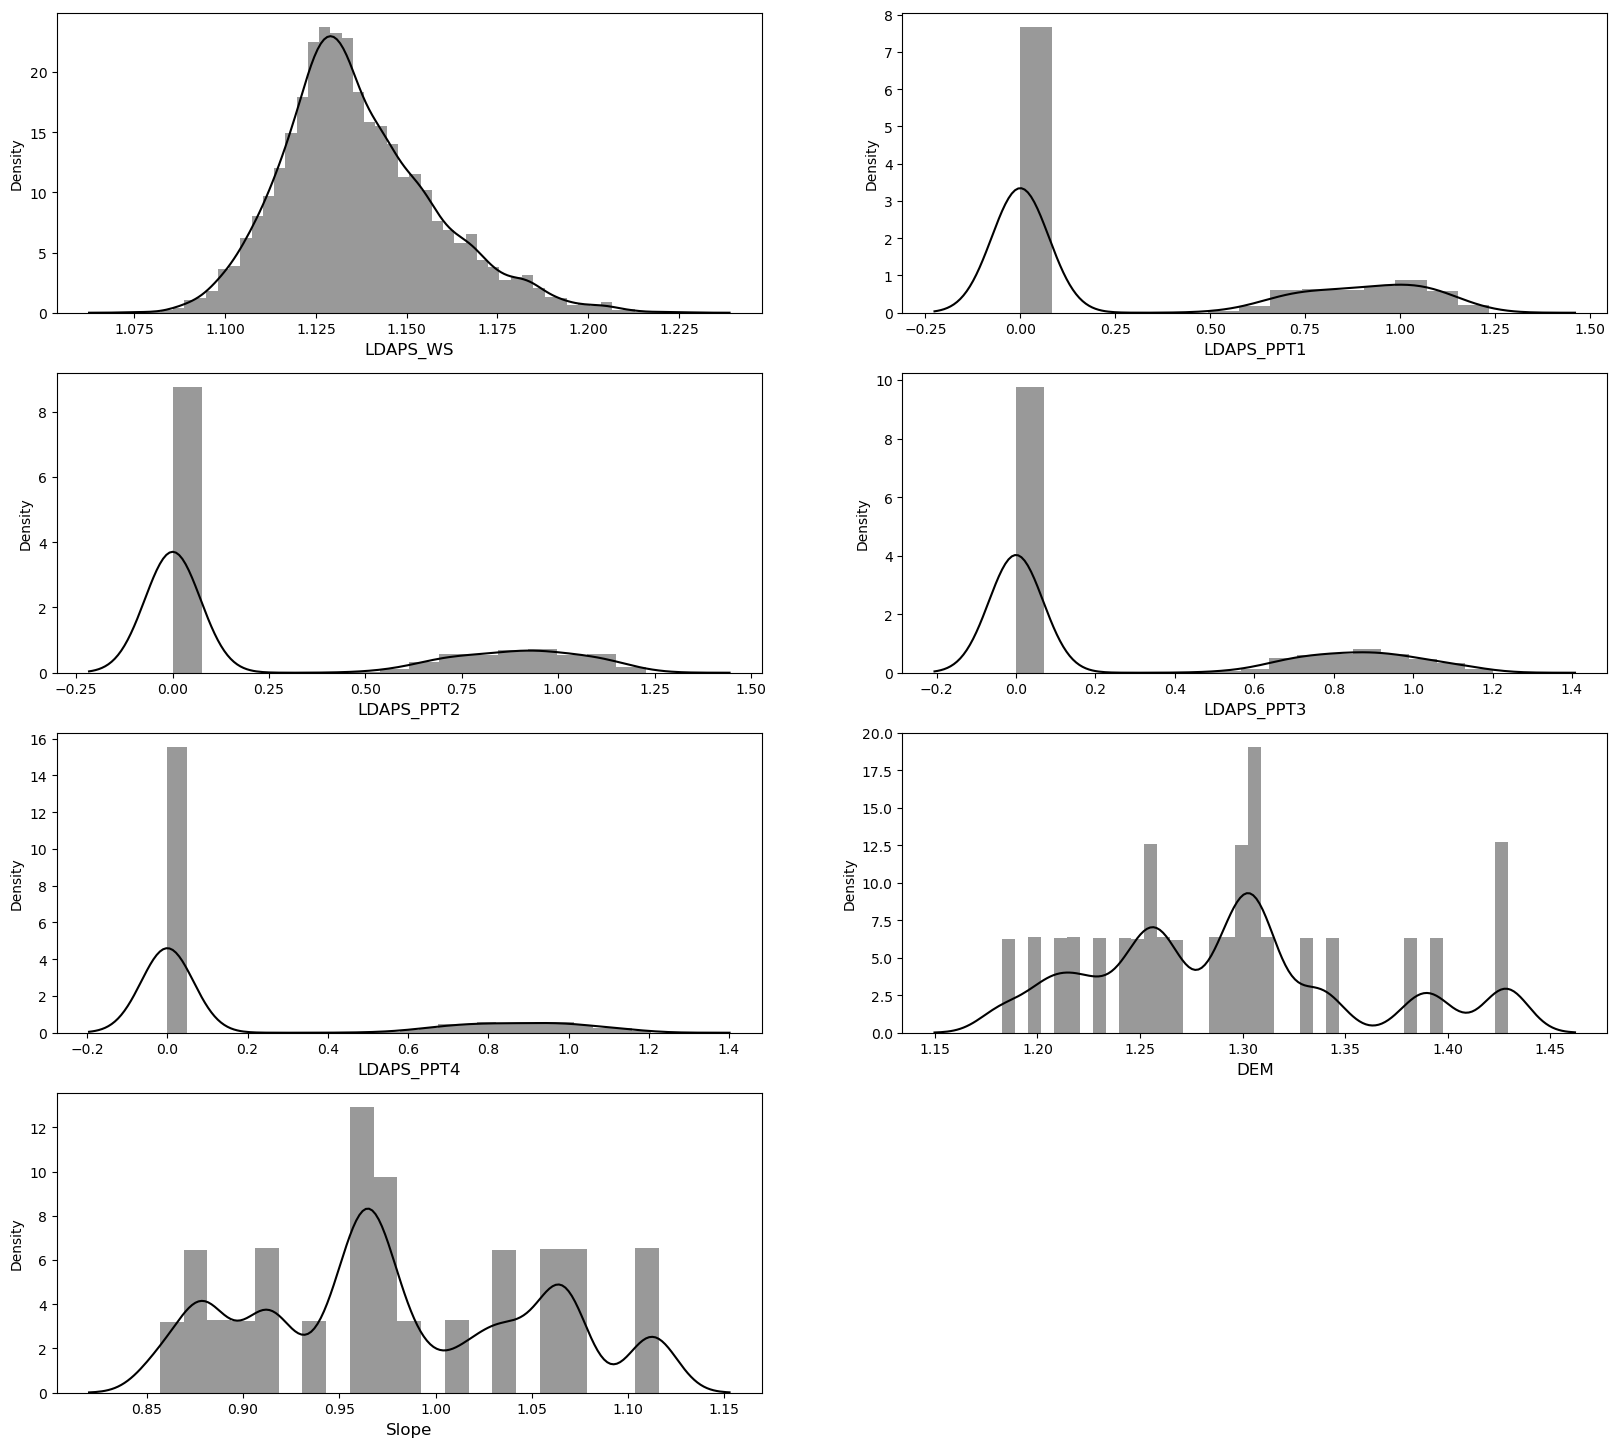

In [145]:
plt.figure(figsize=(20,60))
pltno=1
for column in temp:
    if pltno<=24:
        plt.subplot(13,2,pltno)
        sns.distplot(temp[column], color='black')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### 15th Root is performing good for the data so we select 15 root

In [146]:
#'LDAPS_WS', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope'
data['LDAPS_WS']=np.power(data['LDAPS_WS'], 1/15)
data['LDAPS_PPT1']=np.power(data['LDAPS_PPT1'], 1/15)
data['LDAPS_PPT2']=np.power(data['LDAPS_PPT2'], 1/15)
data['LDAPS_PPT3']=np.power(data['LDAPS_PPT3'], 1/15)
data['LDAPS_PPT4']=np.power(data['LDAPS_PPT4'], 1/15)
data['DEM']=np.power(data['DEM'], 1/15)
data['Slope']=np.power(data['Slope'], 1/15)

In [147]:
data.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            0.635872
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          0.678924
LDAPS_PPT2          0.865703
LDAPS_PPT3          0.950172
LDAPS_PPT4          1.280185
lat                 0.085377
lon                -0.289048
DEM                 0.514854
Slope               0.175700
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Mth                -0.703092
Year                0.013575
dtype: float64

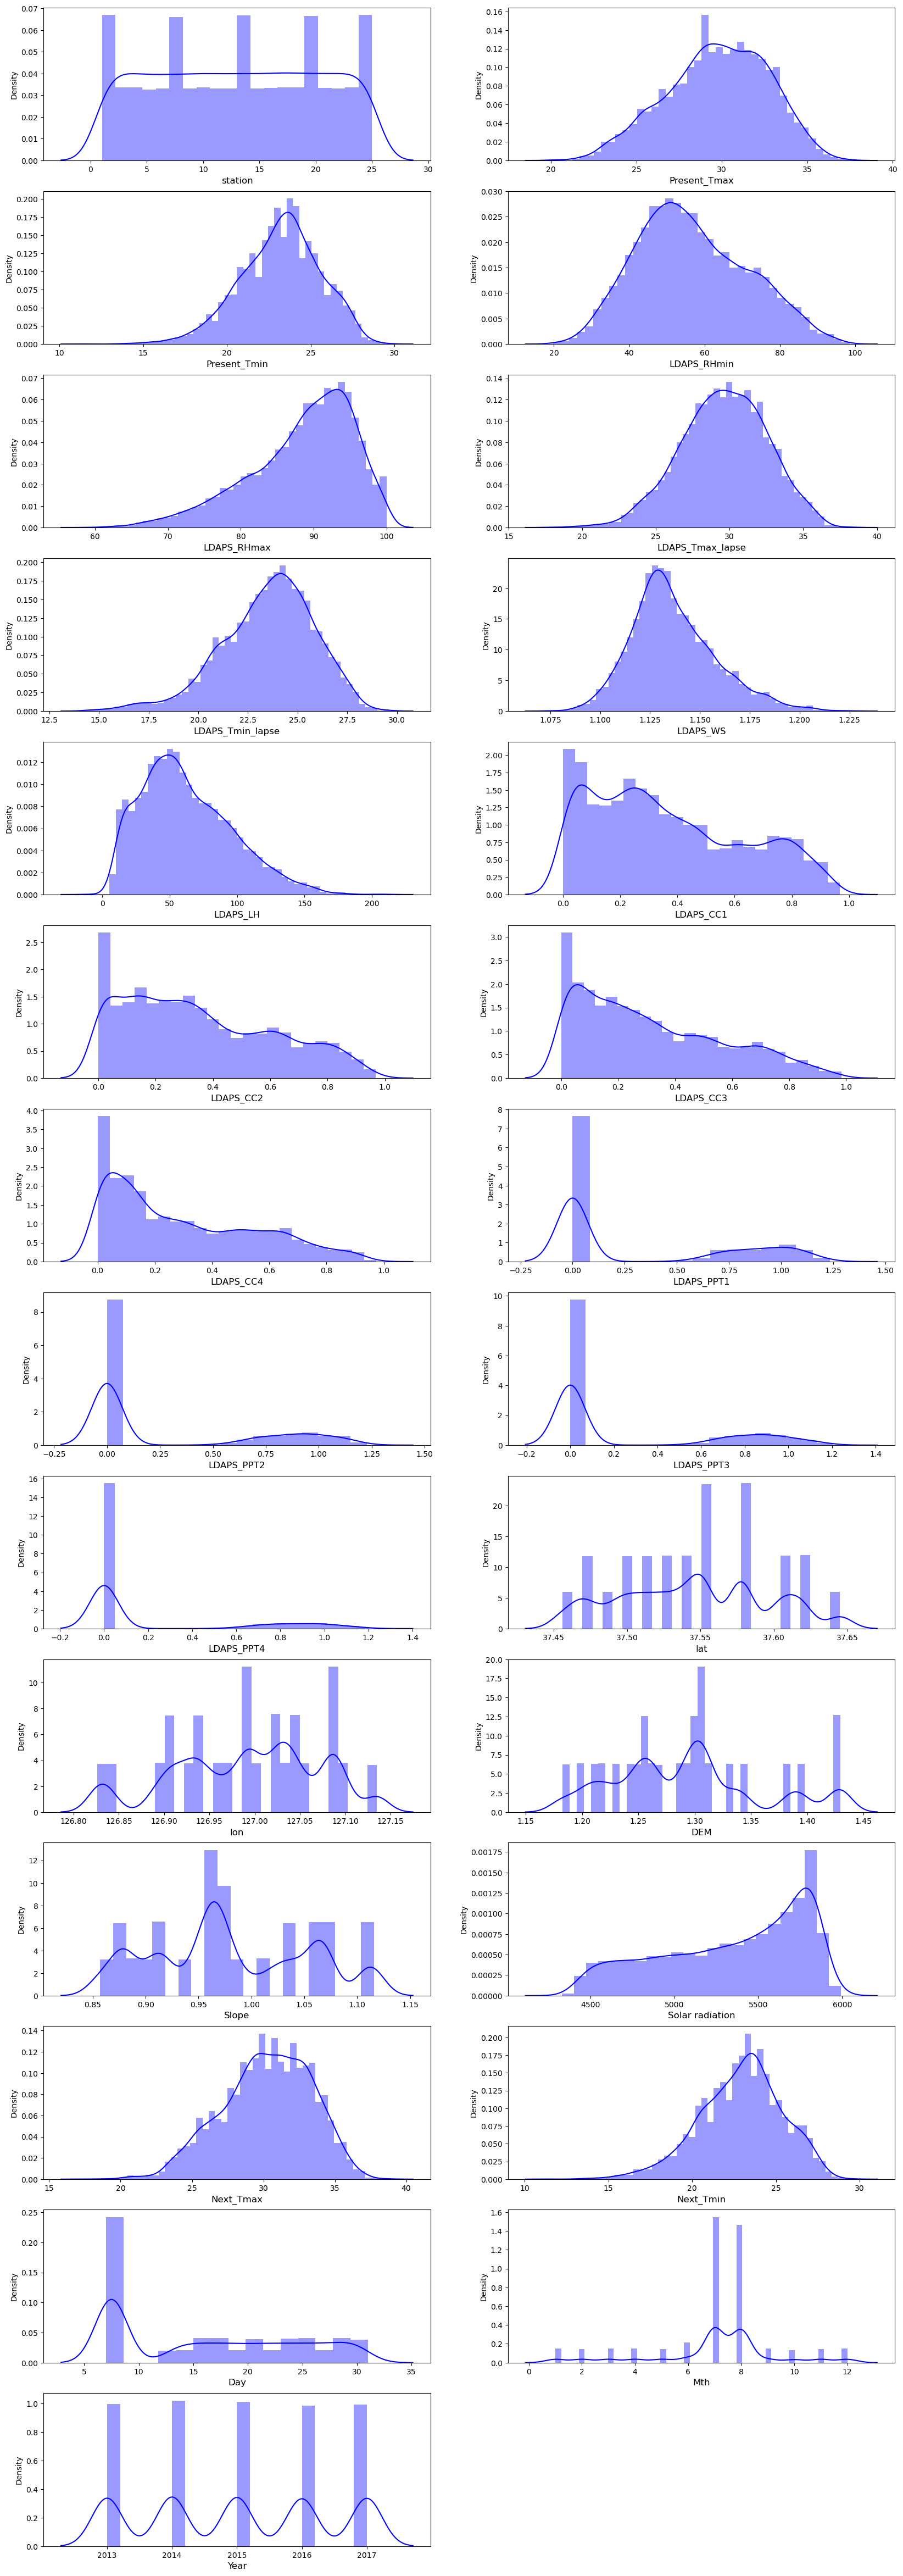

In [148]:
plt.figure(figsize=(20,60))
pltno=1
for column in data:
    if pltno<=27:
        plt.subplot(14,2,pltno)
        sns.distplot(data[column], color='blue')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

### Count plot for getting nature of data in Target columns

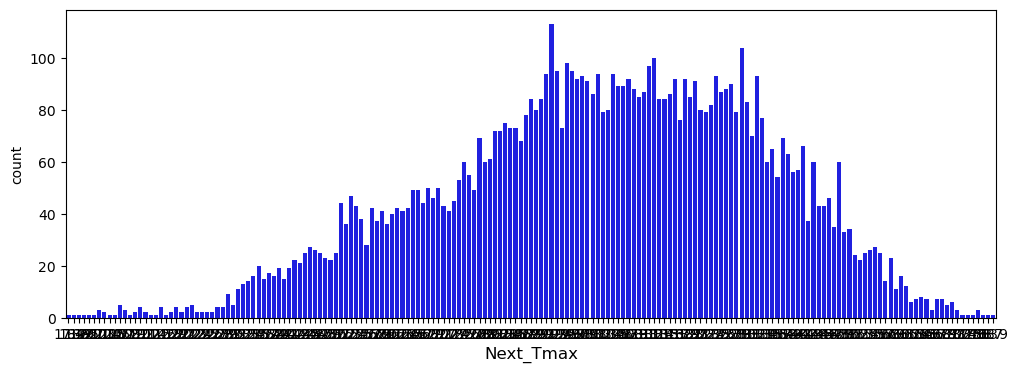

In [149]:
plt.figure(figsize=(12,4))
sns.countplot(data['Next_Tmax'], color='b')
plt.xlabel('Next_Tmax', fontsize=12)
plt.show()

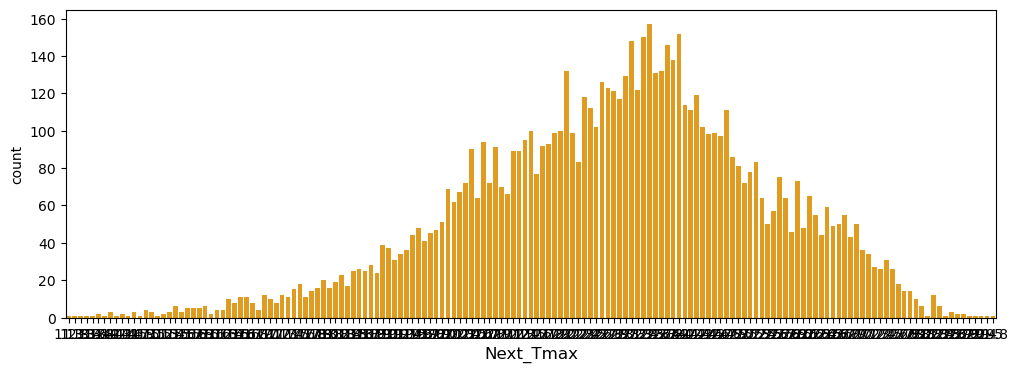

In [150]:
plt.figure(figsize=(12,4))
sns.countplot(data['Next_Tmin'], color='orange')
plt.xlabel('Next_Tmax', fontsize=12)
plt.show()

#### Observation:
Both our target columns 'Next_Tmax' and 'Next_Tmin' are seem to be continious, so our problem statement is related to Regression Problem

#### # Box plot

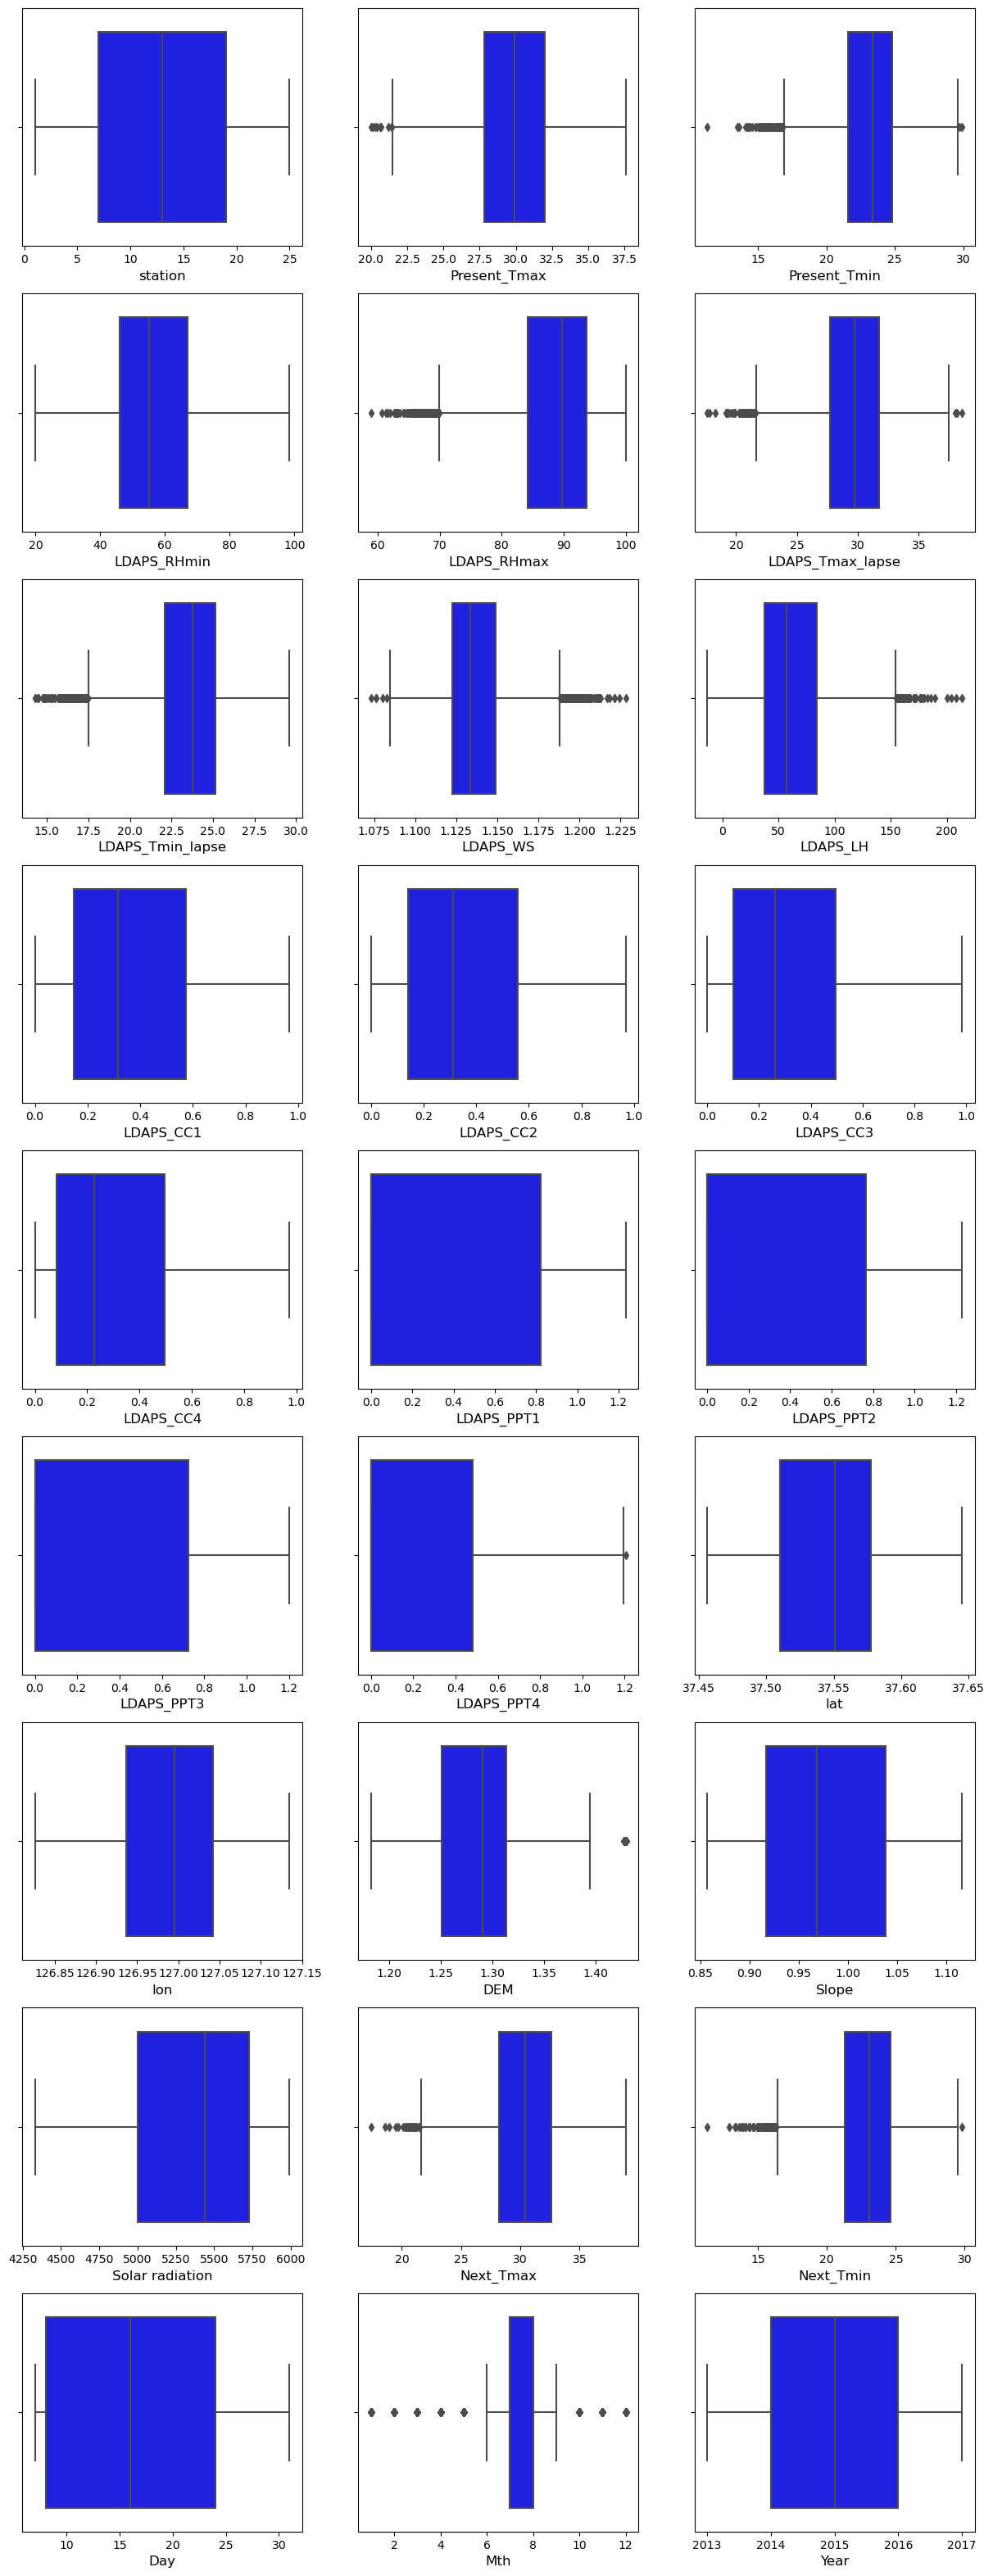

In [151]:
plt.figure(figsize=(15,40))
pltno=1
for column in data:
    if pltno<=27:
        plt.subplot(9,3,pltno)
        sns.boxplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

### # Multi-corelation heatmap

In [152]:
data.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Mth,Year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.011769,-0.132129,0.006539,...,-0.239118,-0.118845,-0.304171,-0.135801,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.116098,0.134246,-0.316333,...,-0.054134,0.007695,-0.164645,-0.108018,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.019710,-0.012817,0.084348,...,-0.081417,-0.045174,-0.257992,-0.173378,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.263135,-0.072195,0.612831,...,0.085027,-0.077590,0.079569,0.082845,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.109638,0.238986,0.435937,...,0.194820,0.025563,0.176170,0.184559,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.274027,0.043663,-0.440878,...,-0.044052,0.091568,-0.150531,-0.119570,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.100702,-0.139675,0.008714,...,-0.099452,-0.024703,-0.196245,-0.171798,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.011769,-0.116098,-0.019710,0.263135,0.109638,-0.274027,-0.100702,1.000000,-0.013089,0.266934,...,0.015929,-0.067876,0.157089,0.134830,0.139037,-0.314142,-0.068807,-0.036076,-0.084115,-0.113974
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,-0.013089,1.000000,-0.148314,...,0.133309,0.024476,0.031347,0.013037,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.266934,-0.148314,1.000000,...,-0.010268,-0.007962,-0.018795,-0.022927,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


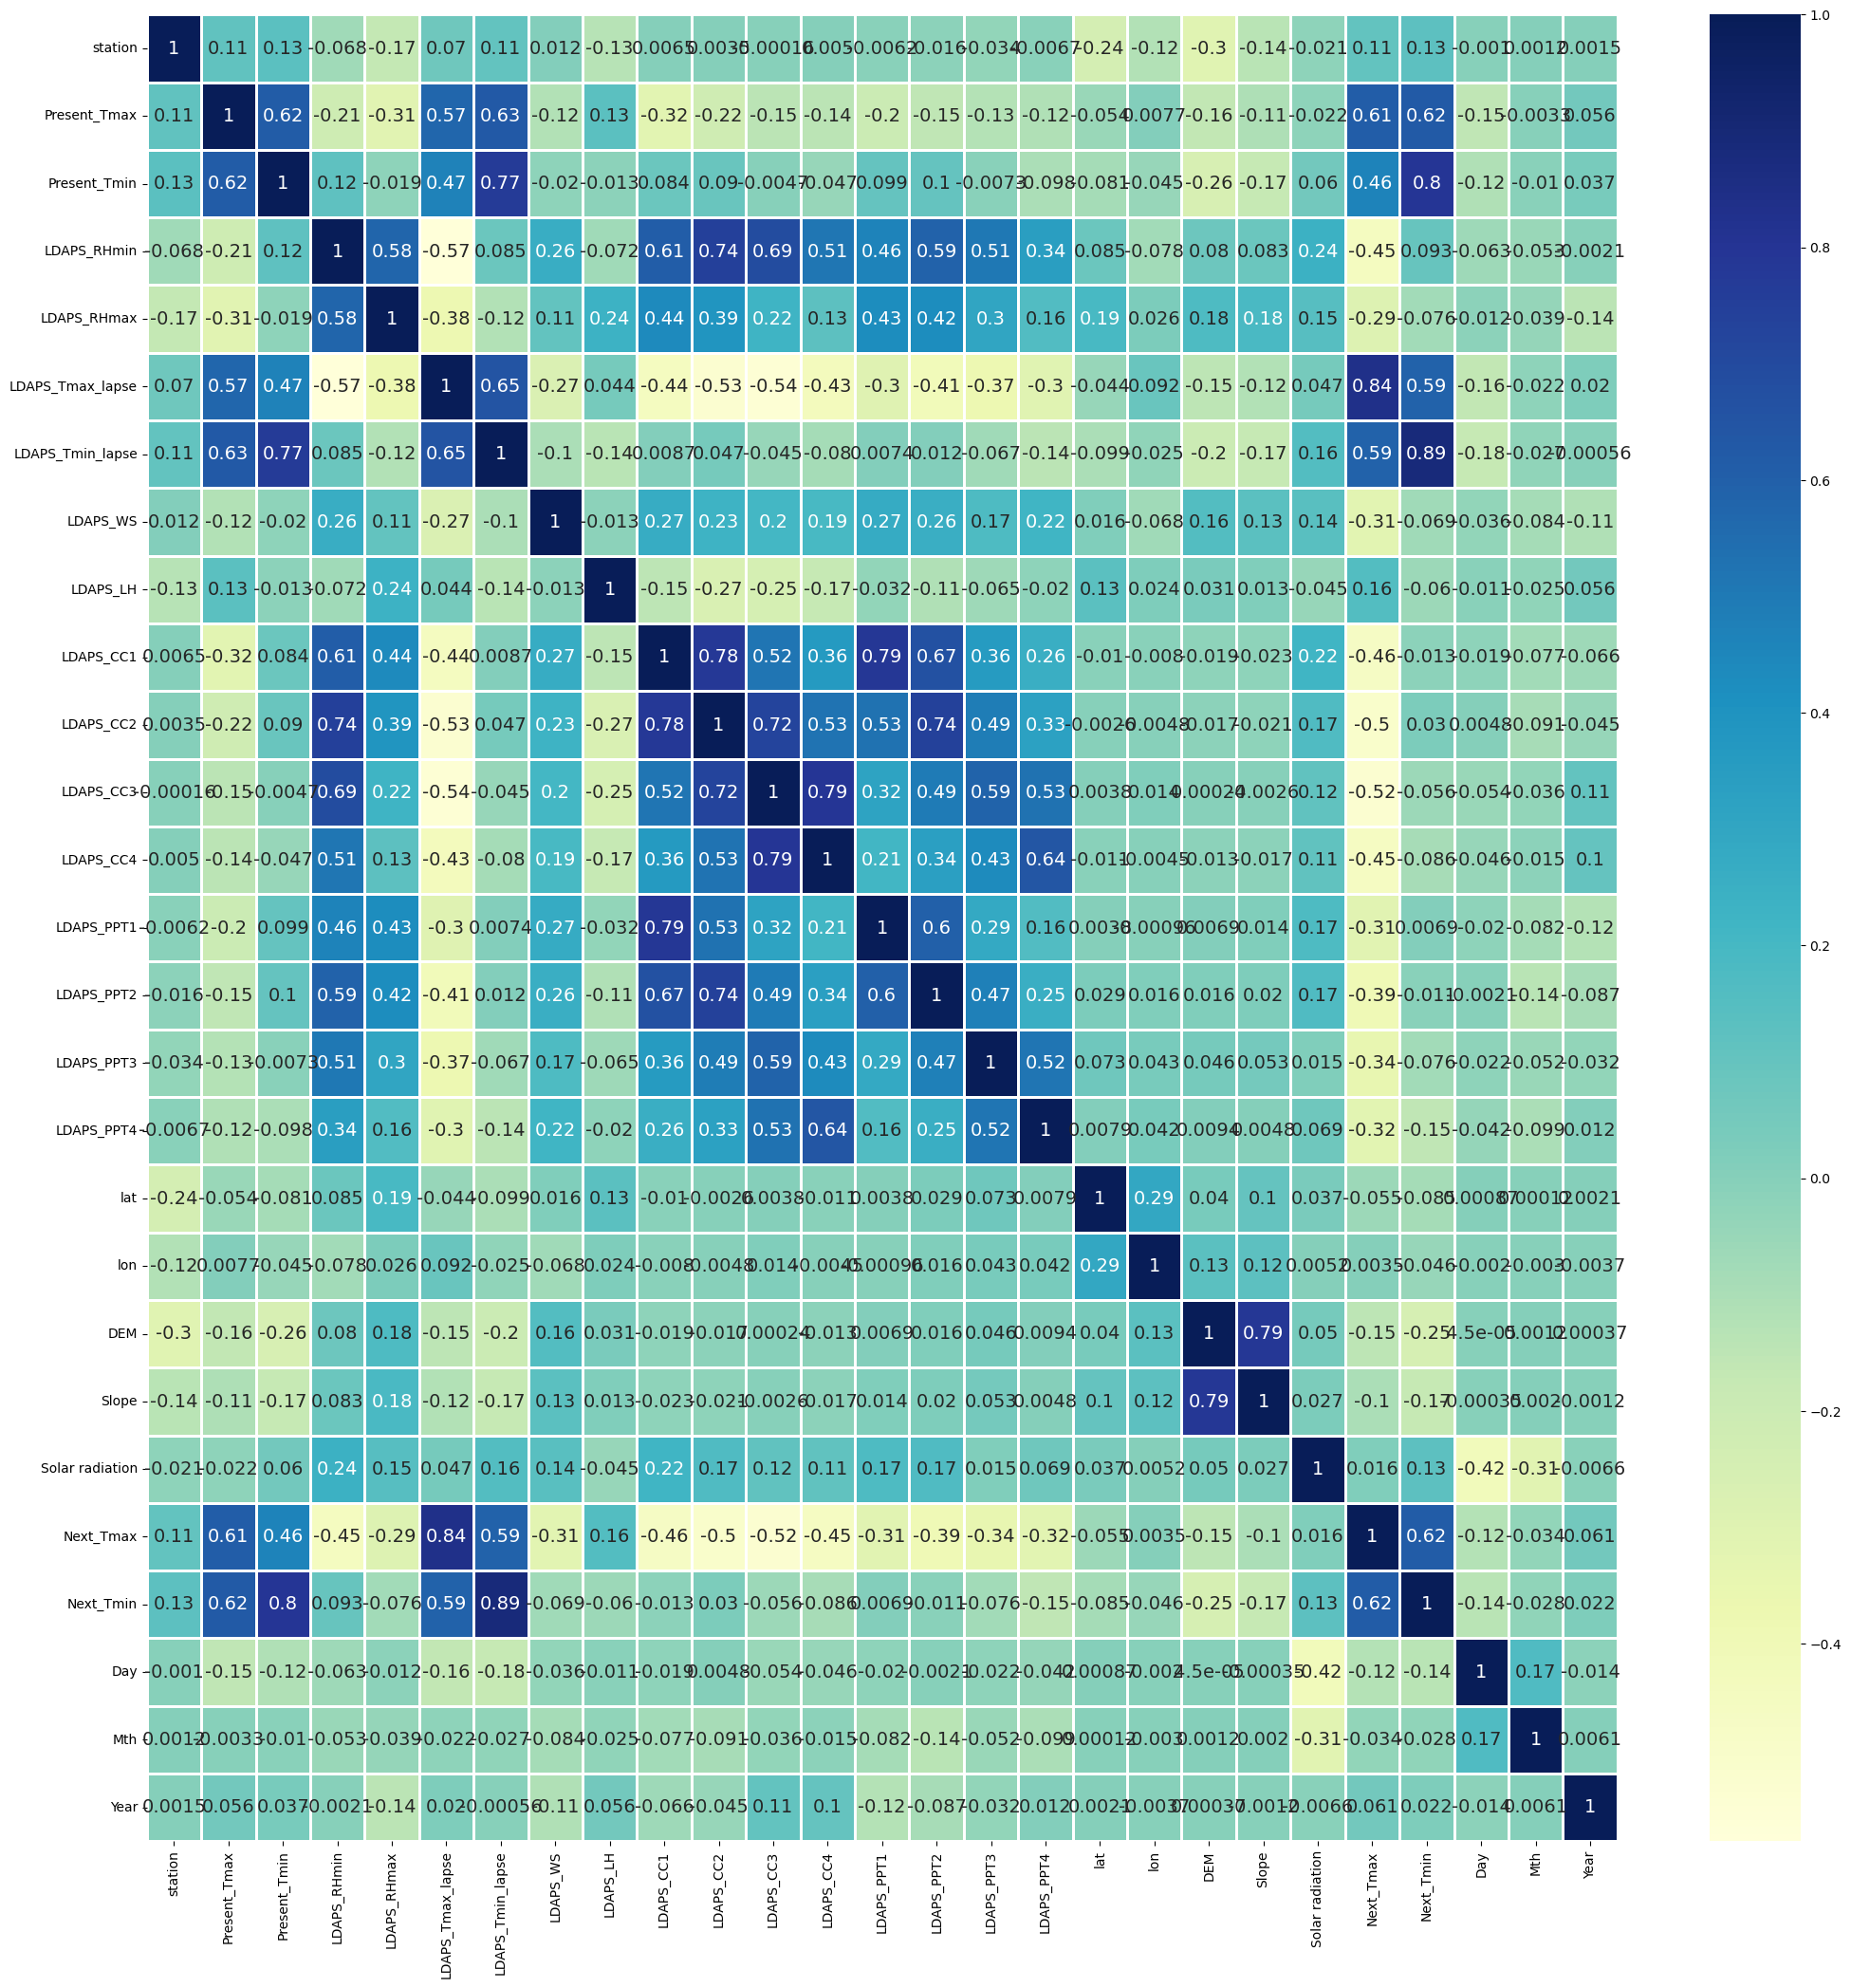

In [153]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=1, annot_kws={"size":14})
plt.show()

#### # Observation:
1. LDAPS_CC1 - LDAPS_PPT1  79% corelation - Showing 79% time Cloud Cover will lead to Precipitation. We can drop column 'LDAPS_CC1' as when Precipitation happen cloud cover will be there  
2. LDAPS_CC1 - LDAPS_CC2   78% corelation - Showing 78% time Cloud Cover continiued for next time slot as well. As we dropping 'LDAPS_CC1' this corelation will not be there  
3. LDAPS_CC2 - LDAPS_PPT2	74% corelation - Showing 74% time Cloud Cover will lead to Precipitation. We can drop column 'LDAPS_CC2' as when Precipitation happen cloud cover will be there  
4. LDAPS_CC2 - LDAPS_RHmin 74% corelation - Showing 74% time Cloud Cover will lead to Humidity. As we dropping 'LDAPS_CC2' this corelation will not be there  
5. LDAPS_CC2 - LDAPS_CC3   72% corelation - Showing 72% time Cloud Cover continiued for next time slot as well. As we dropping 'LDAPS_CC2' this corelation will not be there  
6. LDAPS_CC3 - LDAPS_CC4   79% corelation - Showing 79% time Cloud Cover continiued for next time slot as well. We can drop column 'LDAPS_CC3' as when Precipitation happen cloud cover will be there  
7. Slope -     DEM         79% corelation - We can drop column 'Slope' as this column is less corelated to Target columns compared to column 'DEM'  
8. LDAPS_Tmin_lapse - Present_Tmin 79% corelation - We need to keep both the columns are both are highly corelated to our Target columns  


#### #dropping columns 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', and 'Slope'

In [154]:
data.drop(['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'Slope'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC4         7588 non-null   float64
 10  LDAPS_PPT1        7588 non-null   float64
 11  LDAPS_PPT2        7588 non-null   float64
 12  LDAPS_PPT3        7588 non-null   float64
 13  LDAPS_PPT4        7588 non-null   float64
 14  lat               7588 non-null   float64
 15  lon               7588 non-null   float64
 16  DEM               7588 non-null   float64


#### #replotting multi co-relation heatmap

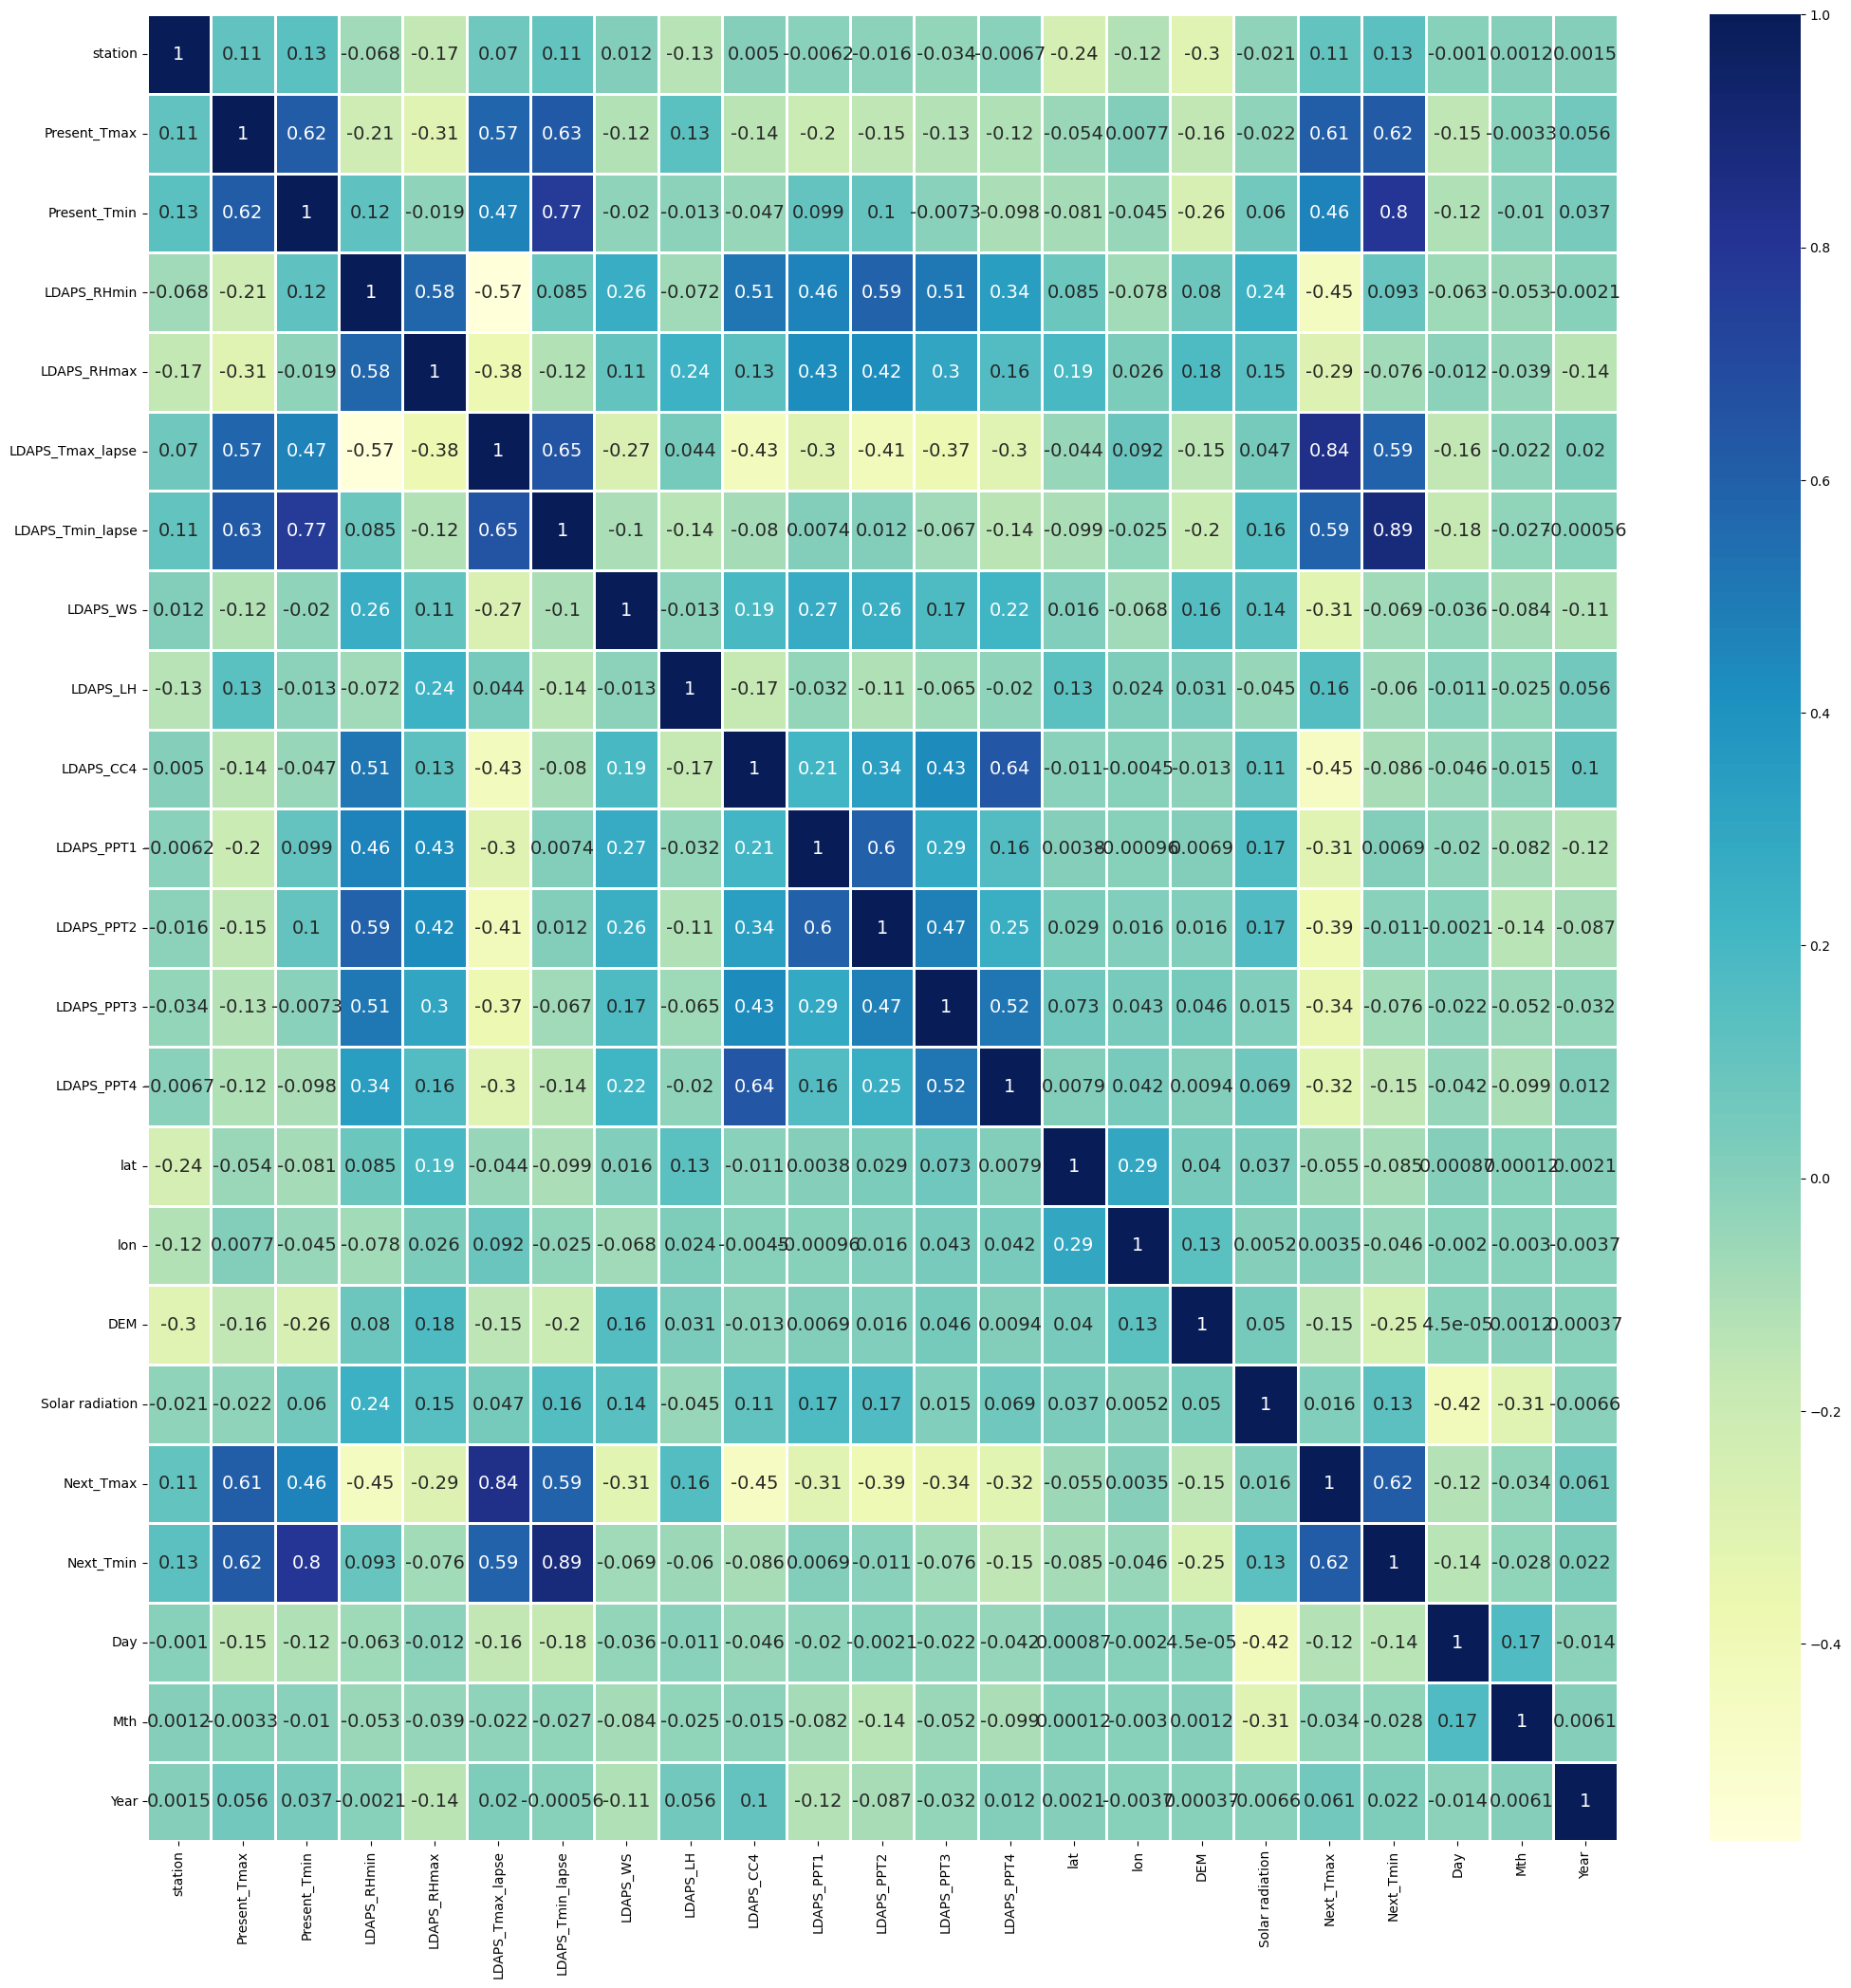

In [155]:
plt.subplots(figsize=(25,25))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=1, annot_kws={"size":14})
plt.show()

#### Now now major concerns of Multi-Corelation

### # Model buliding

#### # Splitting label and features
as we have two target columns 'Next_Tmax', 'Next_Tmin', we shall have two ' y ' columns

In [156]:
X=data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
y1=data['Next_Tmax']
y2=data['Next_Tmin']
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Solar radiation,Day,Mth,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,1.136530,69.451805,0.130928,...,0.0,0.0,0.0,37.6046,126.991,1.429337,5992.895996,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.122924,51.937448,0.127727,...,0.0,0.0,0.0,37.6046,127.032,1.288430,5869.312500,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.128590,20.573050,0.142125,...,0.0,0.0,0.0,37.5776,127.058,1.263287,5863.555664,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.122372,65.727144,0.134249,...,0.0,0.0,0.0,37.6450,127.022,1.290242,5856.964844,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.123489,107.965535,0.170021,...,0.0,0.0,0.0,37.5507,127.135,1.267562,5859.552246,30.0,6.0,2013.0


In [157]:
y1.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [158]:
y2.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

#### # standardising the data via Standard Scaler

In [159]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X) , columns=X.columns)
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC4,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Solar radiation,Day,Mth,Year
0,-1.664607,-0.353318,-0.748029,0.104660,0.382768,-0.525269,-0.215525,-0.005948,0.206603,-0.660441,...,-0.683959,-0.656429,-0.566634,1.186076,-0.005302,2.103074,1.510565,1.662861,-0.476369,-1.411767
1,-1.526052,0.725138,-0.664721,-0.305052,0.311697,0.078334,0.223368,-0.650864,-0.313359,-0.673074,...,-0.683959,-0.656429,-0.566634,1.186076,0.512280,-0.056676,1.222997,1.662861,-0.476369,-1.411767
2,-1.387498,0.624033,0.043400,-0.549344,-0.609425,0.160080,0.449896,-0.382306,-1.244497,-0.616249,...,-0.683959,-0.656429,-0.566634,0.650626,0.840503,-0.442050,1.209602,1.662861,-0.476369,-1.411767
3,-1.248943,0.758840,0.085054,0.103573,1.128335,0.028710,-0.079238,-0.677038,0.096026,-0.647336,...,-0.683959,-0.656429,-0.566634,1.987268,0.386040,-0.028904,1.194265,1.662861,-0.476369,-1.411767
4,-1.110389,0.556630,-0.539758,-0.037665,0.249244,-0.171981,-0.010803,-0.624080,1.349989,-0.506152,...,-0.683959,-0.656429,-0.566634,0.117159,1.812547,-0.376529,1.200286,1.662861,-0.476369,-1.411767


#### # Test train split

In [160]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

### First working with ' y1 ' or 'Next_Tmax' as Target Column

In [161]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(X,y1,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.8029171867125859 And @ Random State :   30


In [162]:
x_train,x_test,y_train,y_test=train_test_split(X ,y1,test_size=0.25, random_state = maxrs)

In [163]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   76.08745916471466  %
R2 Score on test data :   80.2917186712586  %
Mean Absolute Error :   1.0628168616033629
Mean Squared Error :   1.9664283316836209
Root Mean Squared Error :   1.4022939533791126


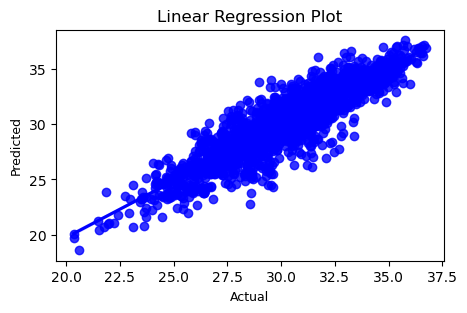

In [164]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='blue')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [165]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   91.94115911623253  %
R2 Score on test data :   88.70808378030706  %
Mean Absolute Error :   0.8040274117026884
Mean Squared Error :   1.1266707432788616
Root Mean Squared Error :   1.0614474755157985


In [166]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   98.64195550602352  %
R2 Score on test data :   92.07149854732275  %
Mean Absolute Error :   0.678563521349499
Mean Squared Error :   0.7910801365313644
Root Mean Squared Error :   0.8894268584495099


In [167]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   93.67658465261214  %
Mean Absolute Error :   0.6046768581971539
Mean Squared Error :   0.6309298555614132
Root Mean Squared Error :   0.7943109312866172


In [168]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   77.78715286177219  %
Mean Absolute Error :   1.0462308908803375
Mean Squared Error :   2.2163257775434895
Root Mean Squared Error :   1.4887329436616528


In [169]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   76.08744860126569  %
R2 Score on test data :   80.29115312025097  %
Mean Absolute Error :   1.06282322933793
Mean Squared Error :   1.9664847605272044
Root Mean Squared Error :   1.4023140734254949


In [170]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   87.45607162650457  %
R2 Score on test data :   87.60852834272931  %
Mean Absolute Error :   0.8722698138616716
Mean Squared Error :   1.2363808153365623
Root Mean Squared Error :   1.111926623180038


In [171]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   89.79602749296292  %
R2 Score on test data :   89.99138332777426  %
Mean Absolute Error :   0.7436086580709649
Mean Squared Error :   0.998627280427735
Root Mean Squared Error :   0.9993134045071821


### # Cross validation score

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [173]:
#Linear Regression Model
score1=cross_val_score(ln,X,y1,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.76071145 0.79200556 0.7605276  0.7602759  0.7782582 ]
Avg Score :  77.0355740345476 %
Difference between CV score and R2 Score is  :  3.2561446367110003 %


In [174]:
# KNN Model
score2=cross_val_score(knn,X,y1,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.87243175 0.89791884 0.87009592 0.87494975 0.88580084]
Avg Score :  88.02394193162135 %
Difference between CV score and R2 Score is  :  0.6841418486857154 %


In [175]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y1,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.89663296 0.91633799 0.89423695 0.90232317 0.91129319]
Avg Score :  90.41648532881977 %
Difference between CV score and R2 Score is  :  1.6550132185029764 %


In [176]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y1,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.92545475 0.93923428 0.92545094 0.92819708 0.93387778]
Avg Score :  93.04429648549248 %
Difference between CV score and R2 Score is  :  0.6322881671196545 %


In [177]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y1,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.76636283 0.80750244 0.78187285 0.79427668 0.78567387]
Avg Score :  78.71377330365522 %
Difference between CV score and R2 Score is  :  -0.9266204418830304 %


In [178]:
# Ridge model
score6=cross_val_score(Ri,X,y1,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.76069862 0.79201297 0.76053527 0.76027284 0.77826271]
Avg Score :  77.03564809179028 %
Difference between CV score and R2 Score is  :  3.2555050284606923 %


In [179]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y1,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.84575232 0.86977353 0.84747673 0.85225582 0.86370899]
Avg Score :  85.5793477593724 %
Difference between CV score and R2 Score is  :  2.0291805833569265 %


In [180]:
# SVR model
score8=cross_val_score(svr,X,y1,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.87667155 0.90125002 0.87049723 0.87164221 0.89178449]
Avg Score :  88.236910078585 %
Difference between CV score and R2 Score is  :  1.754473249189259 %


#### # So our best performing model with Target Column as ' y1 ':
#### Extra Trees Regressor model  
  
R2 Score on Train data :   100.0  %  
R2 Score on test data :   93.6  %  
Mean Absolute Error :   0.60  
Mean Squared Error :   0.63  
Root Mean Squared Error :   0.79  
  
Avg CV Score :  93.04 %  
Difference between CV score and R2 Score is  :  0.63 %  

### # Hyper Parameter Tuning taking ' y1 ' as target column

In [181]:
params={'criterion' : ['mse','mae'],
       'max_features': ['auto', 'sqrt', 'log2'],
       'n_estimators' : [10,20,30],
       'min_samples_split': [2, 5],
        'min_samples_leaf' : [1, 4],
        'n_jobs' : [-2,-1,1]}

In [182]:
gscv=GridSearchCV(et,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30], 'n_jobs': [-2, -1, 1]})

In [191]:
print('Best Parameters : ', gscv.best_params_,'\n')
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )

Best Parameters :  {'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30, 'n_jobs': -1} 


Best Score :  0.9104546843164926


In [199]:
best_model_Y1=ExtraTreesRegressor(criterion = 'mse', max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 30, n_jobs= -1)
best_model_Y1.fit(x_train,y_train)
y_pred=best_model_Y1.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y_pred)*100,' %')

R2 Score on test data :   93.72136148750066  %


### # Saving model

In [200]:
import pickle
pickle.dump(best_model_Y1,open('Temprature_Forcast_project_TMax','wb'))

In [201]:
#load model
model_TMax=pickle.load(open('Temprature_Forcast_project_TMax','rb'))

In [202]:
prediction_TMax = model_TMax.predict(x_test)
prediction_TMax

array([32.72333333, 30.6       , 33.70666667, ..., 32.79333333,
       31.53666667, 28.86333333])

In [203]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_TMax

df

,Actual,predicted
5803,36.1,32.723333
3046,30.5,30.600000
5908,35.1,33.706667
5677,37.0,35.953333
1192,33.9,33.830000
...,...,...
5149,33.8,33.653333
6423,31.5,30.256667
4869,32.9,32.793333
4131,31.0,31.536667


In [204]:
print('*' * 100)
print('*' * 100)
print('*' * 100)

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************


### Now working with ' y2 ' or 'Next_TMin' as our Target Column

In [205]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(X,y2,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)

Max R2 Score is :   0.8527534683524801 And @ Random State :   103


In [206]:
x_train,x_test,y_train,y_test=train_test_split(X ,y2,test_size=0.25, random_state = maxrs)

In [207]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   82.57392316040793  %
R2 Score on test data :   85.27534683524802  %
Mean Absolute Error :   0.7597107616600057
Mean Squared Error :   0.94117046338453
Root Mean Squared Error :   0.9701394040984677


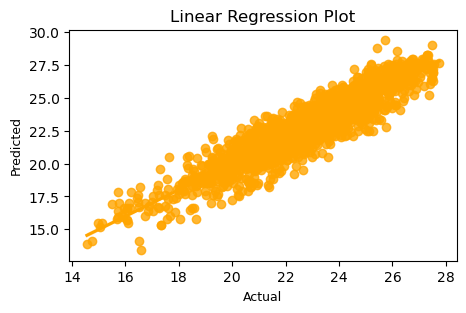

In [208]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='orange')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [209]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   91.54350090581974  %
R2 Score on test data :   88.43643387412946  %
Mean Absolute Error :   0.6607380073800738
Mean Squared Error :   0.7391200843437008
Root Mean Squared Error :   0.8597209339917813


In [210]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   98.60722912627323  %
R2 Score on test data :   91.92238782341414  %
Mean Absolute Error :   0.5483110173958882
Mean Squared Error :   0.5163048603057458
Root Mean Squared Error :   0.71854356882916


In [211]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   92.84818702891624  %
Mean Absolute Error :   0.5141897733263046
Mean Squared Error :   0.45712962150764325
Root Mean Squared Error :   0.676113615827727


In [212]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   80.57886771347349  %
Mean Absolute Error :   0.8145492883500265
Mean Squared Error :   1.2413600421718507
Root Mean Squared Error :   1.1141633821715067


In [213]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   82.57392093017302  %
R2 Score on test data :   85.27502044781768  %
Mean Absolute Error :   0.7597233270188678
Mean Squared Error :   0.9411913254181277
Root Mean Squared Error :   0.9701501561192101


In [214]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   90.1042793926212  %
R2 Score on test data :   89.9519069386555  %
Mean Absolute Error :   0.6270400621334601
Mean Squared Error :   0.6422540685246602
Root Mean Squared Error :   0.8014075545717423


In [215]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   92.5981304522462  %
R2 Score on test data :   91.81533069842594  %
Mean Absolute Error :   0.5426743575577762
Mean Squared Error :   0.523147738219839
Root Mean Squared Error :   0.7232895258607296


### # Cross Validation Score

In [216]:
#Linear Regression Model
score1=cross_val_score(ln,X,y2,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.82893902 0.82643058 0.83554778 0.83731613 0.8293466 ]
Avg Score :  83.15160216728688 %
Difference between CV score and R2 Score is  :  2.123744667961125 %


In [217]:
# KNN Model
score2=cross_val_score(knn,X,y2,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.86843332 0.87991009 0.87158531 0.88319605 0.87381236]
Avg Score :  87.53874248402815 %
Difference between CV score and R2 Score is  :  0.8976913901013184 %


In [218]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y2,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.90307112 0.90282967 0.91153213 0.90772046 0.90680198]
Avg Score :  90.6391071485664 %
Difference between CV score and R2 Score is  :  1.283280674847742 %


In [219]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y2,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.91572696 0.9183162  0.92151651 0.92008339 0.91718158]
Avg Score :  91.85649290723866 %
Difference between CV score and R2 Score is  :  0.9916941216775776 %


In [220]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y2,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.7936464  0.77448776 0.79237172 0.79027988 0.80154552]
Avg Score :  79.0466254055835 %
Difference between CV score and R2 Score is  :  1.5322423078899972 %


In [221]:
# Ridge model
score6=cross_val_score(Ri,X,y2,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.82893841 0.8264305  0.83554292 0.83732295 0.82934762]
Avg Score :  83.15164813450797 %
Difference between CV score and R2 Score is  :  2.1233723133097127 %


In [222]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y2,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.88233374 0.8818147  0.89352981 0.88852214 0.88943978]
Avg Score :  88.71280338742787 %
Difference between CV score and R2 Score is  :  1.2391035512276272 %


In [223]:
# SVR model
score8=cross_val_score(svr,X,y2,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean()*100, "%")
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.90175495 0.90410113 0.91082093 0.90608053 0.90754289]
Avg Score :  90.60600887257576 %
Difference between CV score and R2 Score is  :  1.2093218258501848 %


#### # So our best performing model with Target column as ' y2 ' is:
#### Extra Tree Regressor Model  
  
R2 Score on Train data :   100.0  %  
R2 Score on test data :   92.84  %  
Mean Absolute Error :   0.51  
Mean Squared Error :   0.45  
Root Mean Squared Error :   0.67  
  
Avg CV Score :  91.85 %  
Difference between CV score and R2 Score is  :  0.99 %  

### So we have Extra Tree Regressor Model as Final model

### # Hyper Parameter Tuning taking ' y2 ' as target column

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
params={'criterion' : ['mse','mae'],
       'max_features': ['auto', 'sqrt', 'log2'],
       'n_estimators' : [10,20,30],
       'min_samples_split': [2, 5],
        'min_samples_leaf' : [1, 4],
        'n_jobs' : [-2,-1,1]}

In [226]:
gscv=GridSearchCV(et,params,cv=3)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30], 'n_jobs': [-2, -1, 1]})

In [229]:
print('Best Parameters : ', gscv.best_params_)
print('=' * 100,'\n')
print('Best Score : ', gscv.best_score_ )

Best Parameters :  {'criterion': 'mae', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30, 'n_jobs': -2}

Best Score :  0.9051002791255005


In [230]:
best_model_Y2=ExtraTreesRegressor(criterion = 'mae', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 30, n_jobs= -2)
best_model_Y2.fit(x_train,y_train)
y_pred=best_model_Y2.predict(x_test)
print('R2 Score on test data :  ',r2_score(y_test,y_pred)*100,' %')


R2 Score on test data :   92.73525243549774  %


### # Saving model

In [231]:
#save model
import pickle
pickle.dump(best_model_Y2,open('Temprature_Forcast_project_TMin','wb'))

In [234]:
#load model
model_TMin=pickle.load(open('Temprature_Forcast_project_TMin','rb'))

In [235]:
prediction_TMin = model_TMin.predict(x_test)
prediction_TMin

array([21.39      , 24.89      , 18.79333333, ..., 17.22666667,
       24.02666667, 20.98      ])

In [236]:
df=pd.DataFrame()
df['Actual'] = y_test
df['predicted']=prediction_TMin

df.sample(10)

,Actual,predicted
4703,21.5,20.686667
3901,23.7,24.330000
3207,18.9,19.006667
4484,19.1,19.030000
1445,23.7,22.903333
5545,26.8,27.053333
1444,21.7,21.780000
5623,27.5,27.543333
7362,20.9,20.920000
3479,20.2,20.173333


### Comments

The Project is sucessfully pridicting the Next day Max and Min Temprature with accuracy of around 93%

The Model used is Extra Trees Regressor Model as this model is predicting with accuracy of 93% and with errors less than 1% and Average CV score is also around 93%

The prediction can be done by loading models - 'Temprature_Forcast_project_TMax' & 'Temprature_Forcast_project_TMin' using pickel, and passing the Features